# Assignment #1 - Salary Prediction

Group 5 - Members
- Aishlee C0913045
- Ashick Rijo C0910364
- Ernie Sumoso Vicuna C0881591
- Danilo Diaz C0889539
- Yogita Sharma C0913011

# Dataset Description

For this exercise we want to know how to predict salary using dataset extracted by Barry Becker from the US 1994 Census database.

Each row represents one unique employee currently working at a company on some job position. The features provided for each record are:


- __age__ : age of the person in years
- __workclass__ : is a socioeconomic term used to describe persons in a social class marked by jobs that provide low pay, require limited skill, or physical labor
- __fnlwgt__ : final weight. In other words, this is the number of people the census believes the entry represents
- __education__: the highest level of education achieved by an individual
- __education-num__: the highest level of education achieved in numerical form
- __marital-status__: marital status of an individual
- __occupation__: the general type of occupation of an individual
- __relationship__: represents what this individual is relative to others
For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all.
- __race__: descriptions of an individual’s race
- __sex__: the biological sex of the individual
- __capital-gain__: capital gains for an individual
- __capital-loss__: capital loss for an individual
- __hours-per-week__:  the hours an individual has reported to work per week
- __native-country__:  country of origin for an individual
- __salary__: annual salary in US dollars, two possible values "<=50K" or ">5K0"

**We will perform a predictive analysis to determine whether a person makes over or below 50K US dollars a year**.




# Stage 3 - Data Acquisition & Filtering

Let's start with the data acquisition and __read__ our __dataset__ from the provided file in CSV format.

In this case our __data source__ is Kaggle and will __gather data__ from this single source.

In [1]:
# import necessary libraries for the analysis lyfe-cycle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load dataset
df = pd.read_csv('./salary.csv')

# visualize the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# number of rows and columns of the data
df.shape

(32561, 15)

As we can see, our dataset has __32,561 rows__ and __15 columns__ including our target variable.

Let's check our variables data types and __look for corrupted data__ that we can filter out.

In [4]:
# data types of each colummn of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
# checking for null or missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

__Apparently there are no missing values.__

However, we can check the unique values for each column.

In [6]:
# Checking the unique values in each column
for col in df:
  print(f"\033[94mUnique values in '{col}' column:")
  print(df[col].unique(), end='\n\n')

Unique values in 'age' column:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values in 'workclass' column:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in 'fnlwgt' column:
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values in 'education' column:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in 'education-num' column:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in 'marital-status' column:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique value

We rapidly notice there are some rows filled with __“?”__ values.

Hence, we should __handle this values as corrupted data__. Let’s __classify them as NaN or missing values__.

- It is observed that __' ?' symbol__ is appearing in workclass, occupation, and native-country features.

- Let's replace the '?' symbol with 'NaN' to count them as missing values get rid of them in later steps.

In [7]:
# replace "?" with actual missing values
df.replace(" ?", np.nan, inplace=True)

In [8]:
# checking for null or missing values
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [9]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data
df[vars_with_na].isnull().mean().sort_values(ascending=False) * 100

occupation        5.660146
workclass         5.638647
native-country    1.790486
dtype: float64

Now we can clearly identify that the __'workclass', 'occupation'__ and __'native-country' columns__ have a considerable amount of __missing values__.

Let's __delete these rows__ to filter out the corrupted data.

In [10]:
# Let's drop the rows with missing values
df.dropna(inplace=True)

In [11]:
# checking for null or missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

We have succesfully __acquired__ our dataset from our data source (Kaggle) and __filter out__ any corrupted data.

# Stage 4 - Data extraction

On this stage we __extract__ disparate __data__ and __transform__ it into a __usable format__ for the analysis.

In this case, we need all the data in a structured __tabular format__.

As we can see, our dataset is already in tabular format, and we do __not need to perform__ any further __extraction__ steps.

In [12]:
# Checking the shape of the dataset, rows, columns, duplicate entries & missing values

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 30162
Number of features (columns) in the dataset are: 15
Number of duplicate entries in the dataset are: 23
Number missing values in the dataset are: 0


In [13]:
# Checking the data types of our columns
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

To __standarize our column names__ we could apply a standard __snake case__ to our column names.

In [14]:
# Show columns names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [15]:
# Rename our columns following a snake case
df.columns = df.columns.str.replace('-', '_')

# Show columns names again
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

# Stage 5 - Validation and Cleansing

Now we have to __establish validation rules__ and apply them on our dataset to __remove invalid data__.

First, let's __check__ for __duplicated rows__ and __remove__ them, as these won't add value to our analysis.

In [16]:
# Print the number of duplicated rows
print("Number of duplicated rows:", df[df.duplicated()].shape[0])

Number of duplicated rows: 23


In [17]:
# Visualize some duplicated rows
df[df.duplicated()].head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K


In [18]:
## Let's get rid of duplicate entries

df.drop_duplicates(keep='first',inplace=True)

## Again check the dataset shape, after removing the duplicate entries

print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')

Number of records (rows) in the dataset are: 30139
Number of features (columns) in the dataset are: 15


We have eliminated 24 duplicated rows.

Now, let's __identify__ our __numerical__ and __categorical variables__ so we can perform different validations upon them.

In [19]:
numerical_columns = [col for col in df.columns if df[col].dtypes!='O']
categorical_columns = [col for col in df.columns if df[col].dtypes=='O']

print("Number of Numerical Features:   ", len(numerical_columns))
print("Numerical Features:   ", end = '')
print(numerical_columns)
print("Number of Categorical Features:   ", len(categorical_columns))
print("Categorical Features: ", end = '')
print(categorical_columns)

Number of Numerical Features:    6
Numerical Features:   ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Number of Categorical Features:    9
Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']


Our __numerical__ variables are:
- age
- fnlwgt
- education-num
- capital-gain
- capital-loss
- hours-per-week

Meanwhile, our __categorical__ variables are:
- workclass
- education
- marital-status
- occupation
- relationship
- race
- sex
- native-country
- salary __(target variable)__

Now that we know our variable types, we could perform a __string validation__ on our categorical variables and a __range validation__ on our numerical variables.

In [20]:
# Unique values of our categorical variables
for col in categorical_columns:
  print(f"\033[94mUnique values in '{col}' column:")
  print(df[col].unique(), end='\n\n')

Unique values in 'workclass' column:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

Unique values in 'education' column:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

Unique values in 'marital_status' column:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in 'occupation' column:
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

Unique values in 'relationship' column:
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Unique values in 'race' column:
[' White' ' Black'

We can notice some __extra spaces__ in our categorical values of the dataset

(you can see an extra space before the first letter of each label in the output above)

Let's perform a __string validation__ on our categorical variables by __deleting leading and tailing white spaces__.

In [21]:
# Delete extra spaces from our values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [22]:
# Checking the unique values of our categorical variables again
for col in categorical_columns:
  print(f"\033[94mUnique values in '{col}' column:")
  print(df[col].unique(), end='\n\n')

Unique values in 'workclass' column:
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

Unique values in 'education' column:
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']

Unique values in 'marital_status' column:
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in 'occupation' column:
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']

Unique values in 'relationship' column:
['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

Unique values in 'race' column:
['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']



We have succesfully performed a __string validation__ on our __categorical variables__.

Now let's perform a __range validation__ on our __numerical variables__.

First, let's check their unique values.

In [23]:
# Check the unique values of our numerical variables
for col in numerical_columns:
  print(f"\033[94mUnique values in '{col}' column:")
  print(df[col].unique(), end='\n\n')

Unique values in 'age' column:
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86]

Unique values in 'fnlwgt' column:
[ 77516  83311 215646 ...  84661 257302 201490]

Unique values in 'education_num' column:
[13  9  7 14  5 10 12  4 16 11 15  3  6  1  8  2]

Unique values in 'capital_gain' column:
[ 2174     0 14084  5178  5013  2407 14344 15024  7688  4064  4386  7298
  1409  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597
 25236  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514
  1471  2329  2105  2885 10520  2202  2961 27828  6767  2228  1506 13550
  2635  5556  4787  3781  3137  3818   914   401  2829  2977  4934  2062
  2354  3464  5455 15020  1424  3273 22040  4416 10566  4931  7430 34095
  6497  3908   114  2346  2907  1151  9386  2414  2290  3418 15831 41310
  4508  2538  3456  18

Based on our knowledge about the columns:

- __age__: must be an integer positive number
- __fnlwgt__: must be an integer positive number
- __education-num__: must be an integer positive number
- __capital-gain__: must be a positive number or zero
- __capital-loss__: must be a positive number or zero
- __hours-per-week__: must be an integer positive number

So let's __clean our data__ by performing a __range validations__ on our __numerical columns__.

In [24]:
# Delete out of range values (invalid data)
for column in numerical_columns:
    if column in ['age', 'fnlwgt', 'education_num', 'hours_per_week']:
        df.drop(df[df[column] <= 0].index, inplace=True)
    elif column in ['capital_gain', 'capital_loss']:
        df.drop(df[df[column] < 0].index, inplace=True)

df.shape

(30139, 15)

We have succesfully __validated and cleaned__ our dataset, eliminating __invalid data__ and __performing validations__ depending on our variables types.

# Stage 6 - Data aggregation & Representation

With our data validated and cleaned we can proceed to __integrate__ our datasets together into a __unified view__

However, we are working with only __one dataset__ gathered from a single source.

So there is no need to perform further aggregation or representation steps.

If we had two or more datasets we would have to integrate them together into a single unified view using a common field among the different datasets.

# Stage 7 - Data Analysis

Now we can start our data analysis to __predict__ if the person makes __over or below $50K annually__ based on our predictive variables.

Remember that our __target variable__ is the __'salary' column__ which is a categorical variable.

For our data analysis we have performed the next steps:

- __7.1__ Target variable exploration
- __7.2__ Numerical variables exploration
- __7.3__ Handling Outliers
- __7.4__ Normalizing values - Scaling, Label encoding, and One-Hot encoding
- __7.5__ Correlation between variables
- __7.6__ Splitting the data - Test & Train datasets
- __7.7__ Modelling
- __7.8__ Cross Validation
- __7.9__ Evaluating Results - R squared, MAE, MSE


# 7.1 Target variable exploration

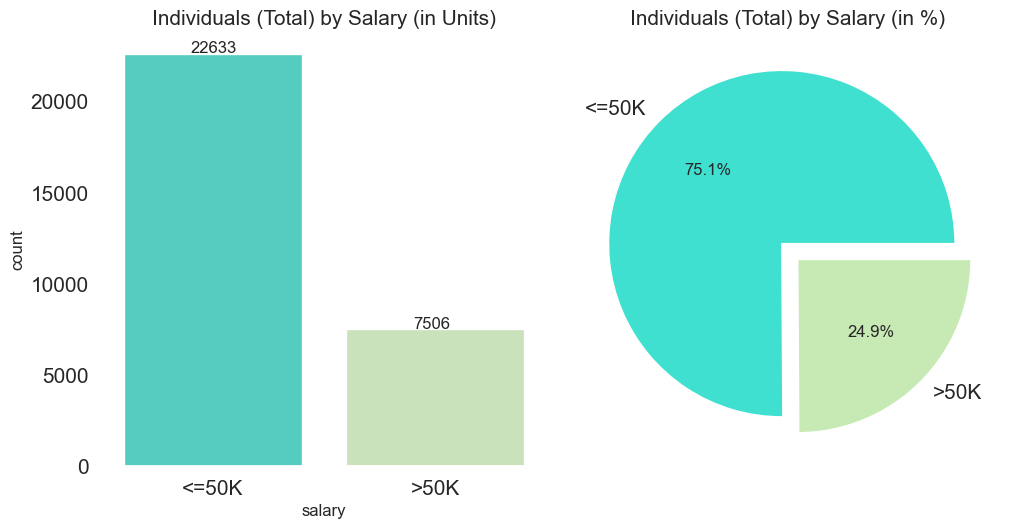

In [25]:
## Let's take a deeper look into SALARY (the target variable in our dataset)

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':15,'ytick.labelsize':15, 'figure.autolayout':True})
my_pal = ('#40E0D0','#c7e9b4', '#EEE8AA', '#D2B48C', '#FAFAD2','#FAEBD7', '#D8BFD8','#F4A460','#F08080')
my_xpl = [0.05, 0.08]

plt.subplots(figsize=(15,15))

## Total Individuals by Salary (in Units)
plt.subplot(3,3,1)
plt.title('Individuals (Total) by Salary (in Units)', fontdict={'fontsize':15})
ax = sns.countplot(x="salary", data=df, palette=my_pal, order=df['salary'].value_counts().index)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+40))

## Total Individuals by Salary (in %)
plt.subplot(3,3,2)
plt.title('Individuals (Total) by Salary (in %)', fontdict={'fontsize':15})
df['salary'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', autopct='%1.1f%%')

plt.show()

It appears that the dataset is somewhat imbalanced as __over 75%__ of the records belong to the __"<=50k" salary segment__.

On the other hand, only __around 25%__ belong to the __">50k" salary segment__.

Let's do some analysis of our numerical variables.

# 7.2 Numerical variables exploration

In [26]:
# statistically describe our dataset (only numerical columns)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30139.0,38.441720,13.131426,17.0,28.0,37.0,47.0,90.0
fnlwgt,30139.0,189795.025980,105658.624341,13769.0,117627.5,178417.0,237604.5,1484705.0
education_num,30139.0,10.122532,2.548738,1.0,9.0,10.0,13.0,16.0
capital_gain,30139.0,1092.841202,7409.110596,0.0,0.0,0.0,0.0,99999.0
capital_loss,30139.0,88.439928,404.445239,0.0,0.0,0.0,0.0,4356.0
hours_per_week,30139.0,40.934703,11.978753,1.0,40.0,40.0,45.0,99.0


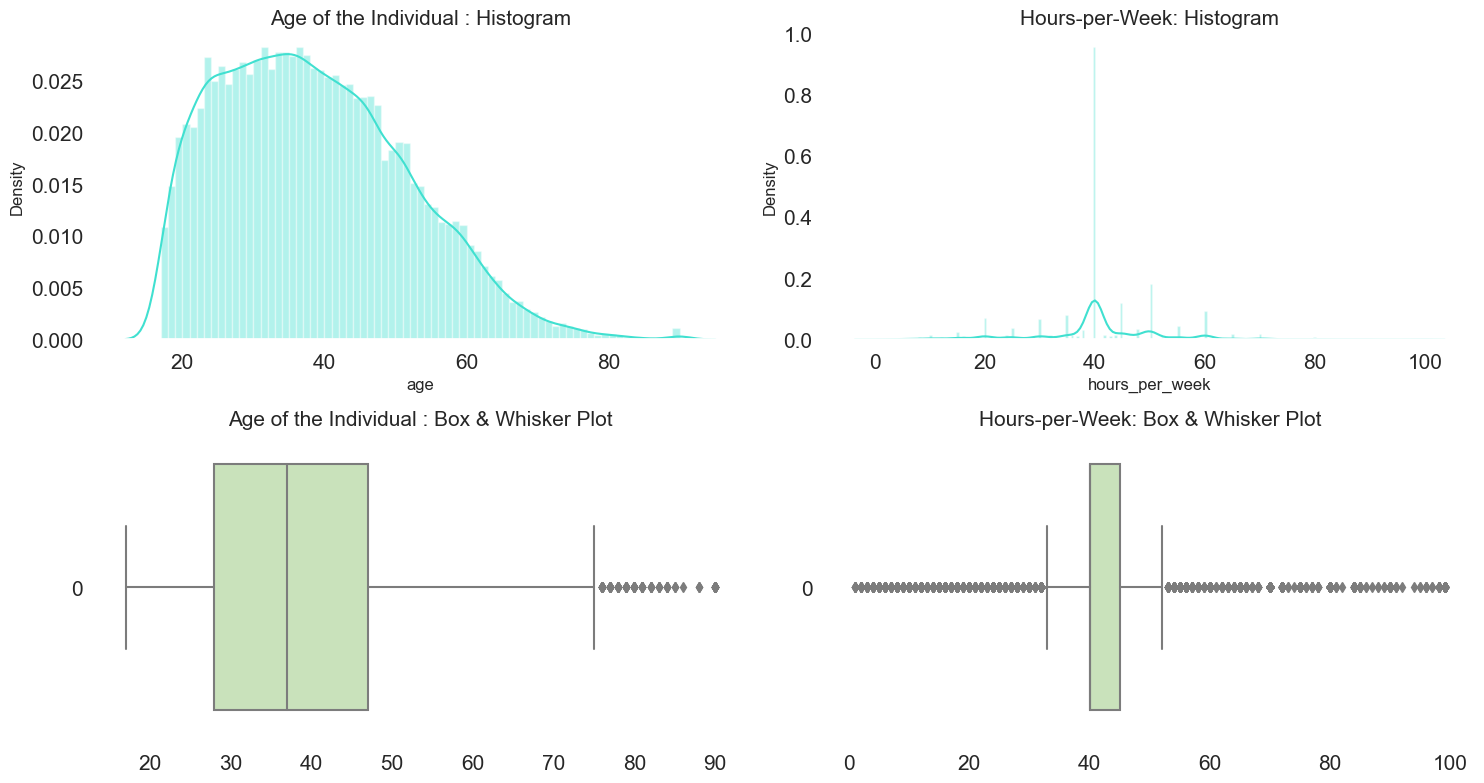

In [27]:
## Plot histograms, box & whisker graphics to understand the distribution of our numerical variables and identify outliers

# Variables plotted: 'age', 'hours-per-week'

plt.subplots(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Age of the Individual : Histogram', fontdict={'fontsize':15})
sns.distplot(df.age, color='#40E0D0', bins=73)

plt.subplot(2,2,2)
plt.title('Hours-per-Week: Histogram', fontdict={'fontsize':15})
sns.distplot(df['hours_per_week'], color='#40E0D0', bins=198)

plt.subplot(2,2,3)
plt.title('Age of the Individual : Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df['age'], orient='h',color="#c7e9b4")

plt.subplot(2,2,4)
plt.title('Hours-per-Week: Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df['hours_per_week'], orient='h', color="#c7e9b4")

plt.show()

Some insights about our Age and Hours-per-Week columns:
- Both Age and Hours-per-Week features have __significant number of outliers__.
- In the Age feature, you can see many __individuals aged above 70 years__.
- Similarly, in Hours-per-Week feature, you can see __individuals working for more than 70 hours__.
- Even for self employed people, working for 70 Hours-per-Week is extremely difficult.


<Axes: title={'center': 'Education Number: Box & Whisker Plot'}>

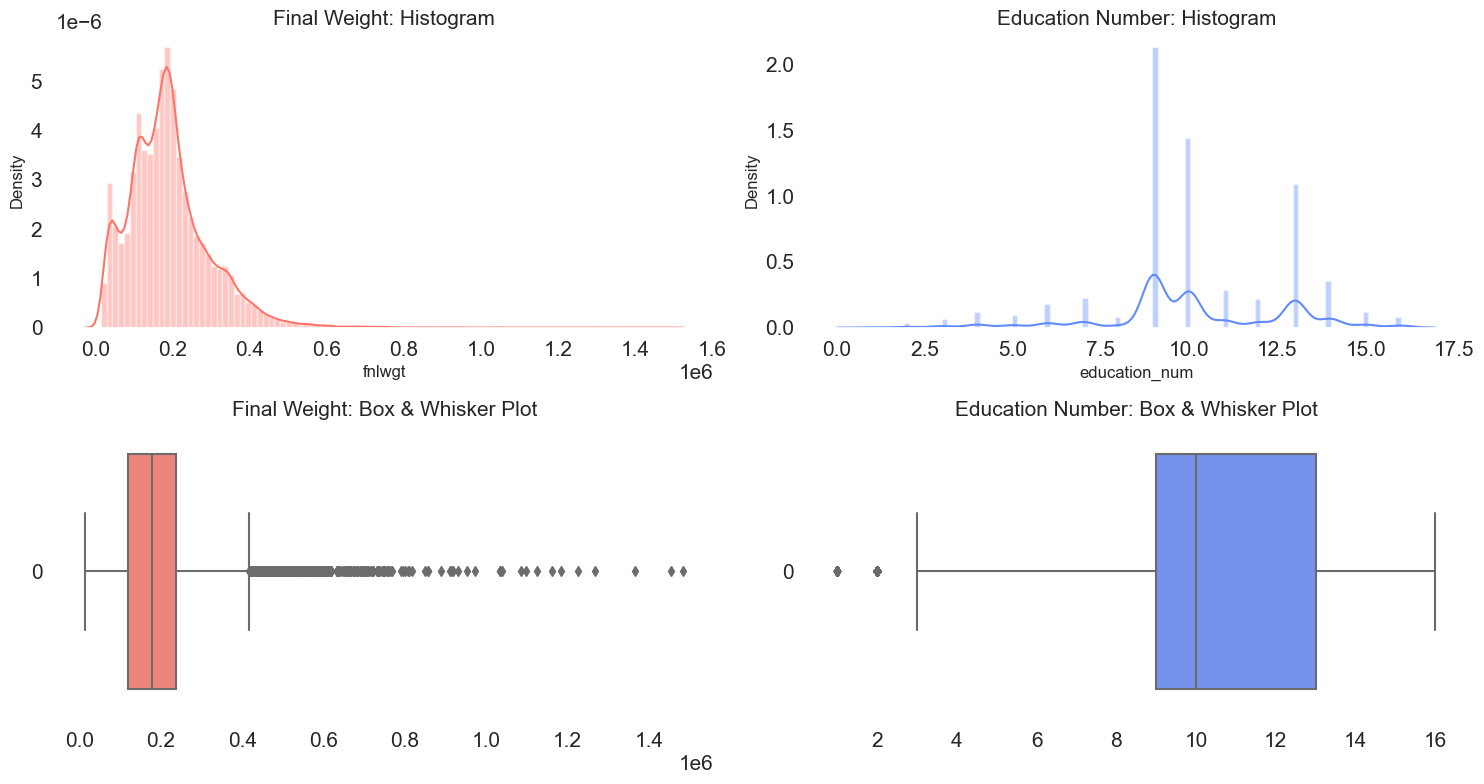

In [28]:
## Plot histograms, box & whisker graphics to understand the distribution of our numerical variables and identify outliers

# Variables plotted: 'fnlwgt', 'education_num'

plt.subplots(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Final Weight: Histogram', fontdict={'fontsize':15})
sns.distplot(df['fnlwgt'], color='#FF7469', bins=98)

plt.subplot(2,2,2)
plt.title('Education Number: Histogram', fontdict={'fontsize':15})
sns.distplot(df['education_num'], color='#618AFF', bins=98)

plt.subplot(2,2,3)
plt.title('Final Weight: Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df['fnlwgt'], orient='h', color="#FF7469")

plt.subplot(2,2,4)
plt.title('Education Number: Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df['education_num'], orient='h', color="#618AFF")


Some insights about our Final Weight and Education Number columns:
- The Final Weight feature has a __significant number of outliers on the right side__.
- The Final Weight feature seems to follow a __normal distribution__.
- Most of the Education Number values seems to be __evenly distributed__, with an __exception__ of 3 unique values (9, 10, 13).
- The Education Number feature only presents a __couple of outliers__ on the left tail.

<Axes: title={'center': 'Capital Loss: Box & Whisker Plot'}>

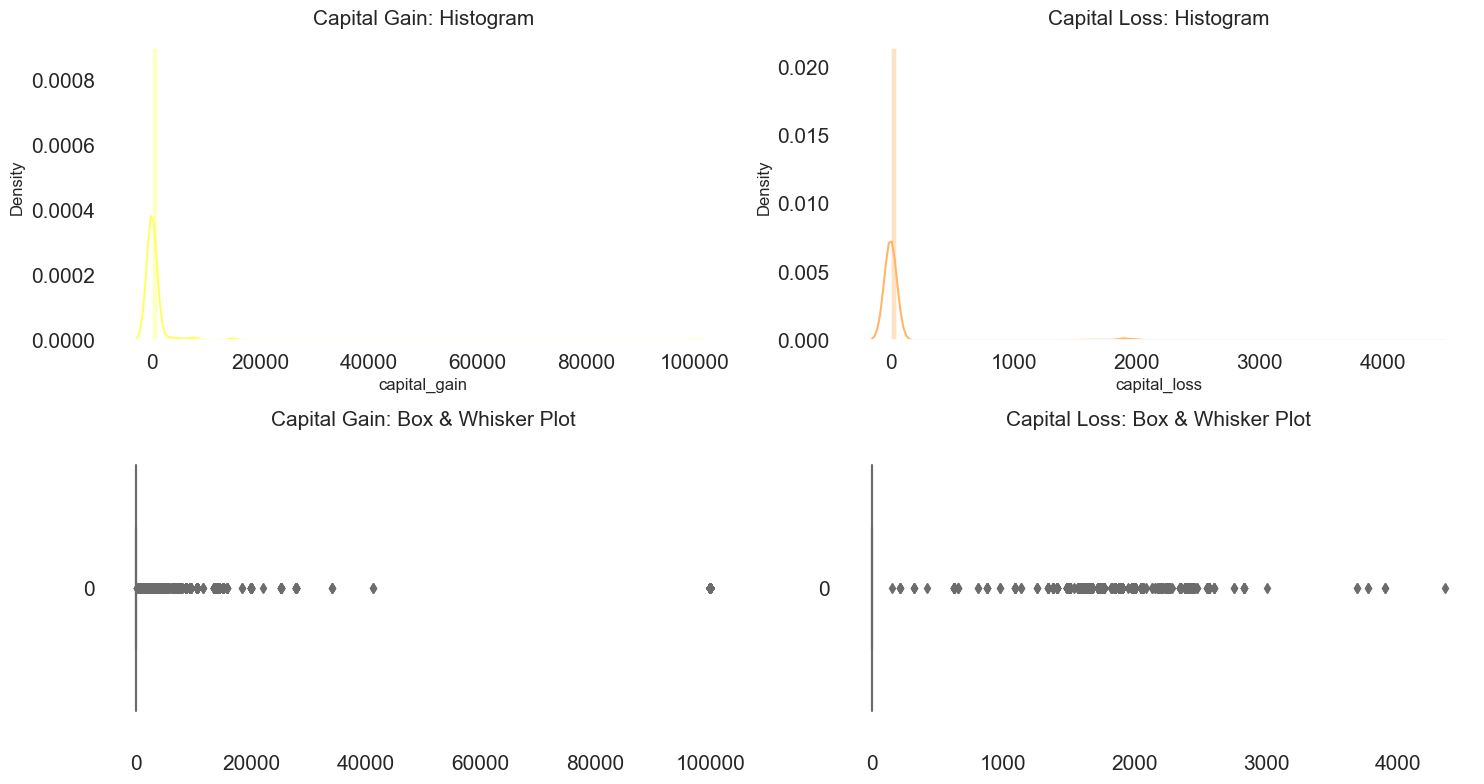

In [29]:
## Plot histograms, box & whisker graphics to understand the distribution of our numerical variables and identify outliers

# Variables plotted: 'capital_gain', 'capital_loss'

plt.subplots(figsize=(15,8))

plt.subplot(2,2,1)
plt.title('Capital Gain: Histogram', fontdict={'fontsize':15})
sns.distplot(df['capital_gain'], color='#FDFF69', bins=98)

plt.subplot(2,2,2)
plt.title('Capital Loss: Histogram', fontdict={'fontsize':15})
sns.distplot(df['capital_loss'], color='#FFB669', bins=98)


plt.subplot(2,2,3)
plt.title('Capital Gain: Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df['capital_gain'], orient='h', color="#FDFF69")

plt.subplot(2,2,4)
plt.title('Capital Loss: Box & Whisker Plot', fontdict={'fontsize':15})
sns.boxplot(df['capital_loss'], orient='h', color="#FFB669")

Some insights about our Capital Gain and Capital Loss columns:
- Both variables have a __huge amount of extreme values__ (outliers) on the __right side__.
- Both columns present a __left skewed distributed data__, where most of the values reside around the left tail
- These outliers could be dragging central tendency estimations like the mean.

# 7.3 Handling Outliers ############## (falta hacer)

# 7.4 Normalizing values - Scaling, Label encoding, and One-Hot encoding


Let's recall our numerical and categorical features.

In [30]:
numerical_features = [col for col in df.columns if df[col].dtypes!='O']
categorical_features = [col for col in df.columns if df[col].dtypes=='O']

print("Numerical Features:   ", end = '')
print(numerical_features)
print("Categorical Features: ", end = '')
print(categorical_features)

Numerical Features:   ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
Categorical Features: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']


To get better results we should apply __standard scaling__ on our __numerical variables.__ and a __label encoding__ or __one-hot encoding__ on our __categorical variables__.

Based on our knowledge about the columns, we choose to apply these techniques to the following columns:

__Standard Scaling:__
- all numerical features

__Label encoding:__
- marital_status
- occupation
- relationship
- race
- sex
- native_country
- salary __(target)__

__One-Hot encoding:__
- workclass
- education

In [31]:
# Defining our different technique lists
label_encoding_features = ['marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'salary']

one_hot_encoding_features = ['workclass', 'education']

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary'],
      dtype='object')

Let's first apply the __label encoding technique__ to convert some of our __categorical features into numerical__.

When doing this the values for our __target variable__ will be:
- 0: if the person earns less than 50K US dollars annually
- 1: if the person earns more than 50k US dollars annually.

In [32]:
## Apply Label encoding on some of our categorical features

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder ()

cat_df = df[label_encoding_features].copy()
num_df = df[numerical_features].copy()
one_hot_encoding_df = df[one_hot_encoding_features].copy()

for i in cat_df:
    cat_df[i] = le.fit_transform(df[i])

## Joining the data to the rest of our columns

df = pd.concat([one_hot_encoding_df, num_df, cat_df], axis=1)
df

,workclass,education,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,marital_status,occupation,relationship,race,sex,native_country,salary
0,State-gov,Bachelors,39,77516,13,2174,0,40,4,0,1,4,1,38,0
1,Self-emp-not-inc,Bachelors,50,83311,13,0,0,13,2,3,0,4,1,38,0
2,Private,HS-grad,38,215646,9,0,0,40,0,5,1,4,1,38,0
3,Private,11th,53,234721,7,0,0,40,2,5,0,2,1,38,0
4,Private,Bachelors,28,338409,13,0,0,40,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,27,257302,12,0,0,38,2,12,5,4,0,38,0
32557,Private,HS-grad,40,154374,9,0,0,40,2,6,0,4,1,38,1
32558,Private,HS-grad,58,151910,9,0,0,40,6,0,4,4,0,38,0
32559,Private,HS-grad,22,201490,9,0,0,20,4,0,3,4,1,38,0


In [33]:
# Checking the value counts for our target variable
df['salary'].value_counts()

0    22633
1     7506
Name: salary, dtype: int64

Now let's __scale__ our __numerical features__ and apply __one-hot encoding__ to our remaining __categorical features__.

But first we have to separate our target column from our predicitve variables.

In [34]:
# Updating our numerical features
numerical_features += label_encoding_features
numerical_features.remove('salary')
print("New numerical features:")
print(numerical_features)

# Create numerical pipeline to scale our numerical values and apply one-hot encoding to some of our categorical features
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

columns_categorical_list = list(one_hot_encoding_features)
columns_numerical_list = list(numerical_features)

pipeline_categorical = Pipeline([
  ('onehot', OneHotEncoder(drop='first')),
])

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("categorical", pipeline_categorical, columns_categorical_list),
  ("numerical", pipeline_numerical, columns_numerical_list),
])

New numerical features:
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


In [35]:
# Apply our techniques using the built pipeline
pipeline_full.fit(df)
df_transformed = pipeline_full.transform(df)
print(f"Before one-hot encoding rows & columns: {df.shape}")
df

Before one-hot encoding rows & columns: (30139, 15)


,workclass,education,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,marital_status,occupation,relationship,race,sex,native_country,salary
0,State-gov,Bachelors,39,77516,13,2174,0,40,4,0,1,4,1,38,0
1,Self-emp-not-inc,Bachelors,50,83311,13,0,0,13,2,3,0,4,1,38,0
2,Private,HS-grad,38,215646,9,0,0,40,0,5,1,4,1,38,0
3,Private,11th,53,234721,7,0,0,40,2,5,0,2,1,38,0
4,Private,Bachelors,28,338409,13,0,0,40,2,9,5,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,27,257302,12,0,0,38,2,12,5,4,0,38,0
32557,Private,HS-grad,40,154374,9,0,0,40,2,6,0,4,1,38,1
32558,Private,HS-grad,58,151910,9,0,0,40,6,0,4,4,0,38,0
32559,Private,HS-grad,22,201490,9,0,0,20,4,0,3,4,1,38,0


In [36]:
df_transform = pd.DataFrame(df_transformed)
print(f"After one-hot encoding rows & columns (excluding target):  {df_transform.shape}")
df_transform

After one-hot encoding rows & columns (excluding target):  (30139, 33)


,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.128996,0.145925,-0.218673,-0.078031,0.948085,-1.478987,-0.261297,0.385108,0.692725,0.264666
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.128996,-0.147502,-0.218673,-2.332060,-0.386977,-0.734570,-0.885672,0.385108,0.692725,0.264666
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440434,-0.147502,-0.218673,-0.078031,-1.722039,-0.238292,-0.261297,0.385108,0.692725,0.264666
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.225149,-0.147502,-0.218673,-0.078031,-0.386977,-0.238292,-0.885672,-2.010755,0.692725,0.264666
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.128996,-0.147502,-0.218673,-0.078031,-0.386977,0.754264,2.236200,-2.010755,-1.443574,-5.306510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.736639,-0.147502,-0.218673,-0.244996,-0.386977,1.498681,2.236200,0.385108,-1.443574,0.264666
30135,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440434,-0.147502,-0.218673,-0.078031,-0.386977,0.009847,-0.885672,0.385108,0.692725,0.264666
30136,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440434,-0.147502,-0.218673,-0.078031,2.283147,-1.478987,1.611826,0.385108,-1.443574,0.264666
30137,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440434,-0.147502,-0.218673,-1.747682,0.948085,-1.478987,0.987452,0.385108,0.692725,0.264666


# 7.5 Correlation between variables ############## (falta mejorar)

Now we check the __corrleation between our features__, specially with the __target variable (salary)__.

In [37]:
# Let's build our correlation matrix
corr_matrix = df_transform.corr()

df_transform.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.128996,0.145925,-0.218673,-0.078031,0.948085,-1.478987,-0.261297,0.385108,0.692725,0.264666
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.128996,-0.147502,-0.218673,-2.332060,-0.386977,-0.734570,-0.885672,0.385108,0.692725,0.264666
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.440434,-0.147502,-0.218673,-0.078031,-1.722039,-0.238292,-0.261297,0.385108,0.692725,0.264666
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.225149,-0.147502,-0.218673,-0.078031,-0.386977,-0.238292,-0.885672,-2.010755,0.692725,0.264666
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.128996,-0.147502,-0.218673,-0.078031,-0.386977,0.754264,2.236200,-2.010755,-1.443574,-5.306510


<Axes: >

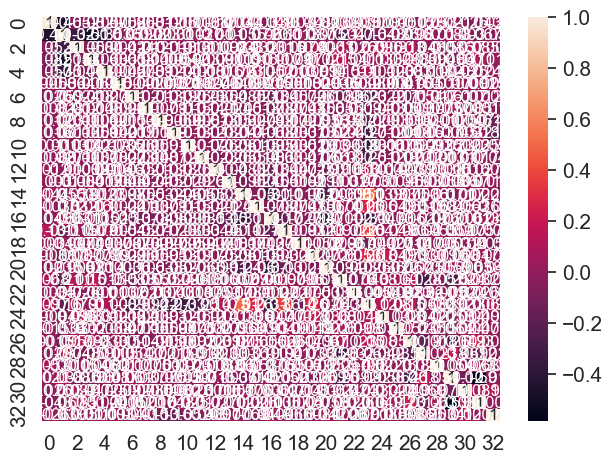

In [38]:
# using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot = True)

Based on the correlation between our variables, we can __drop some features__ that do __not provide value__ to our __target variable__.

In [42]:
# Base on correlation , drop feactures with low corr
df_transform.drop(columns=["fnlwgt", "education", "race", "workclass", "native_country", "occupation", "marital_status"])

# 7.6 Splitting the data - Test & Train datasets

Let's __split the data__ in our __train and test datasets__ to start training different machine learning algorithms.

In [64]:
# Define our predictive variables and target 
X = df_transform
y = df['salary']

In [65]:
## Splitting the Data 
## We split the data into train & test sets in a 80:20 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

print('-'*34, '\n', f'\033[94mTrain data & Test data shapes', '\n', f'\033[94m '*14, f'\033[94mX            y')
print('-'*34, '\n', f'\033[94mTrain data | ', X_train.shape, y_train.shape, '\n', f'\033[94mTest data  | ', X_test.shape, y_test.shape)

---------------------------------- 
 Train data & Test data shapes 
                X            y
---------------------------------- 
 Train data |  (24111, 33) (24111,) 
 Test data  |  (6028, 33) (6028,)


# 7.7 Modelling

Now that we have successfully split our data, let's __build a regressor__ using __different machine learning algorithms__ and __finding__ the __best accuracy__ among them.

We will test the following ML algorithms:
- Logistic Regression
- XGBClassifier
- SVC
- DecisionTreeClassifier
- RandomForestClassifier
- GaussianNB
- KNeighborsClassifier

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, log_loss

Model = [
    LogisticRegression(),
    XGBClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    KNeighborsClassifier(3)] 

# Logging for Visual Comparison
log_cols=["Model", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in Model:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print(f'\033[94m-'*30, '\n')
    print(name)
    
    test_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, test_predictions)
    print("Accuracy: {:.5%}".format(acc))
    
    test_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, test_predictions)
    print("Log Loss: {:.5}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print(f'\033[94m-'*30)

------------------------------ 

LogisticRegression
Accuracy: 82.21632%
Log Loss: 0.39423
------------------------------ 

XGBClassifier
Accuracy: 86.64565%
Log Loss: 0.28833
------------------------------ 

SVC
Accuracy: 82.01725%
Log Loss: 0.39029
------------------------------ 

DecisionTreeClassifier
Accuracy: 80.65693%
Log Loss: 6.9719
------------------------------ 

RandomForestClassifier
Accuracy: 85.26875%
Log Loss: 0.36277
------------------------------ 

GaussianNB
Accuracy: 34.20703%
Log Loss: 7.0709
------------------------------ 

KNeighborsClassifier


AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [ ]:
## Visualizing the accuracy & log loss data

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':12,'ytick.labelsize':12, 'figure.autolayout':True})
plt.subplots(figsize=(10,5))

plt.subplot(1,2,1)
sns.set_color_codes("bright")
sns.barplot(x='Accuracy', y='Model', data=log, color='#40E0D0')
plt.xlabel('Accuracy %')
plt.title('Model Accuracy', fontdict={'fontsize':12})

plt.subplot(1,2,2)
sns.set_color_codes("bright")
sns.barplot(x='Log Loss', y='Model', data=log, color='#c7e9b4')
plt.xlabel('Log Loss')
plt.title('Model Log Loss', fontdict={'fontsize':12})

plt.show()

# 7.8 Cross validation ########## (falta hacer)

# 7.9 Evaluating results - R squared, MAE, MSE ###### (falta hacer)

In [76]:
from sklearn.metrics import r2_score

# r2 score
r2_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [75]:
from sklearn import metrics

# calculating MAE
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))

# calculating MSE
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))

# calculating RMSE
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Stage 8 - Data Visualization ############### (falta terminar)

Given the analysis, we have to __communicate__ the __results__ to our business users through the use of __graphics__.

Business users should be able to __understand__ and give __feedback__ to our analysis.

Now, we will __plot__ the __predicted value__ for the __salary__ column, based on our regression model results.

# Stage 9 - Utilization of Analysis Results

- As we __succeed in predicting the salary values__ for the dataset extracted by Barry Becker from the US Census database, we could __apply__ these __results__ to predict __future census__ in the country.

- This will enhance the __understanding of salaries__ in the US __based__ on some other __factors__ like __education, age, workclass__, etc.

- The results could signify a __precedent__ for the __subsequent years__ and __business users__ could __act accordingly__ every year after the census data is released and processed by our regression model.

- When applying these understanding into real-life, other __businesses hiring new employees__ could __place a proper salary range__ based on historical data that we have analyzed. On the other hand, the __government could start initiatives__ to help the lower salary groups and find solutions to increase their quality of life.

- As data scientists, we would have to __iteratively update our datasets__ and __feed__ the new __data to our model__, then tweaking and making the necessary configurations to our models to have __better and updated results__, as we perform our __predictive analysis__.

# References

- Salary Prediction Dataset

https://www.kaggle.com/datasets/ayessa/salary-prediction-classification/data

- Building a performing Machine Learning model

https://www.slideshare.net/CharlesVestur/building-a-performing-machine-learning-model-from-a-to-z

- Employee Salary Prediction (Best ML Algorithms)

https://www.kaggle.com/code/yasserh/employee-salaray-prediction-best-ml-algorithms

- Cross Validation

https://scikit-learn.org/stable/modules/cross_validation.html